## Universidad Galileo
## Statical Learning
## Tarea 1

### Luis Alejandro Samayoa Alvarado
### 19002957

In [2]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [3]:
data=np.load('/home/alejo/Documentos/proyecto_training_data.npy')
tipo_data=data.shape
ext_entreno=0.8*tipo_data[0]
print('El valor a usar en matriz entrenamiento es:')
print(ext_entreno)
print('La base de datos es:')
print(data)

El valor a usar en matriz entrenamiento es:
1168.0
La base de datos es:
[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [4]:
entreno=data[:1168,]
prediccion=data[1169:,]
print(entreno[:,0])
y=entreno[:,0]
print(len(y))
print(np.mean(y))
print(entreno.shape)
print(prediccion.shape)

[208500. 181500. 223500. ... 233170. 245350. 173000.]
1168
180590.27739726027
(1168, 6)
(291, 6)


In [5]:
y=entreno[:,0]
x1=entreno[:,1]
x2=entreno[:,2]
x3=entreno[:,3]
x4=entreno[:,4]
x5=entreno[:,5]

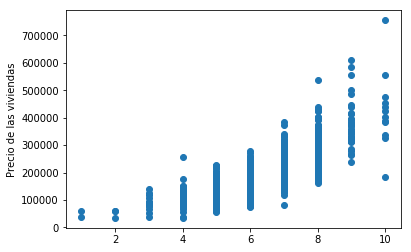

In [13]:
fig = plt.figure()
plt.scatter(x1, y)
plt.ylabel("Precio de las viviendas");

In [10]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Declaramos las variables entrenables de TensorFlow
b1 = tf.Variable(tf.constant(1.), name = "W") 
b0 = tf.Variable(tf.constant(0.), name = "b") 

# Hiperparámetro
lr = tf.placeholder(tf.float32)

In [11]:
Yhat = tf.add(tf.multiply(X, b1),b0) 
cost = tf.reduce_sum(tf.pow(Yhat-Y, 2)) / (2 * ext_entreno) 
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 
init = tf.global_variables_initializer() 
testSummary = tf.summary.scalar(name='Funcion_de_costo', tensor = cost)

## Funcion de entreno
def entrenarModeloLineal(x, y, training_epochs, learning_rate, imprimirCada):
    with tf.Session() as sess: 
        writer = tf.summary.FileWriter('./graficas', sess.graph)
        # Initializing the Variables 
        sess.run(init) 
        for epoch in range(training_epochs): 

            for (_x, _y) in zip(x, y): 
                sess.run(optimizer, feed_dict = {X : _x, Y : _y, lr : learning_rate}) 

            if (epoch + 1) % imprimirCada == 0: 
                # Calculating the cost a every epoch 
                c = sess.run(cost, feed_dict = {X : Xtrain, Y : Ytrain}) 
                print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
         
            summary = sess.run(testSummary, feed_dict = {X : x, Y : y})
            
            writer.add_summary(summary, epoch)
        # Storing necessary values to be used outside the Session 
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 
        
        return (weight, bias, training_cost)